Step 1: importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [43]:
"""**Data Exploration**"""

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Shape: (899, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 907
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  899 non-null    int64  
 1   Survived     899 non-null    int64  
 2   Pclass       899 non-null    int64  
 3   Name         899 non-null    object 
 4   Sex          899 non-null    int64  
 5   Age          899 non-null    float64
 6   SibSp        899 non-null    int64  
 7   Parch        899 non-null    int64  
 8   Ticket       899 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        206 non-null    object 
 11  Embarked     899 non-null    int64  
 12  Title        899 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 98.3+ KB
None

Summary Statistics:
        PassengerId    Survived      Pclass                       Name  \
count    899.000000  899.000000  899.000000                        

In [7]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [14]:
df.drop(columns=['cabin'])


KeyError: "['cabin'] not found in axis"

In [54]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,18


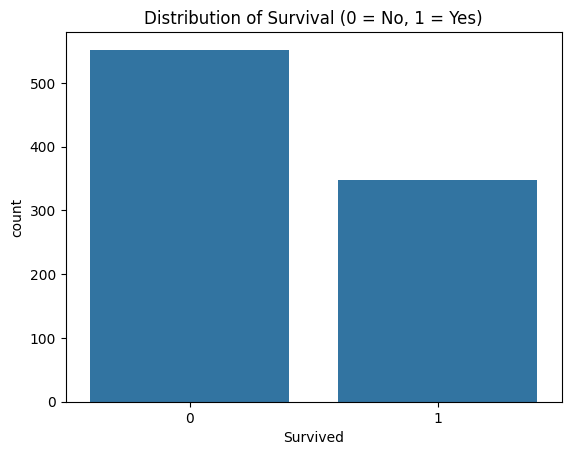

In [44]:
sns.countplot(x='Survived', data=df)
plt.title("Distribution of Survival (0 = No, 1 = Yes)")
plt.show()


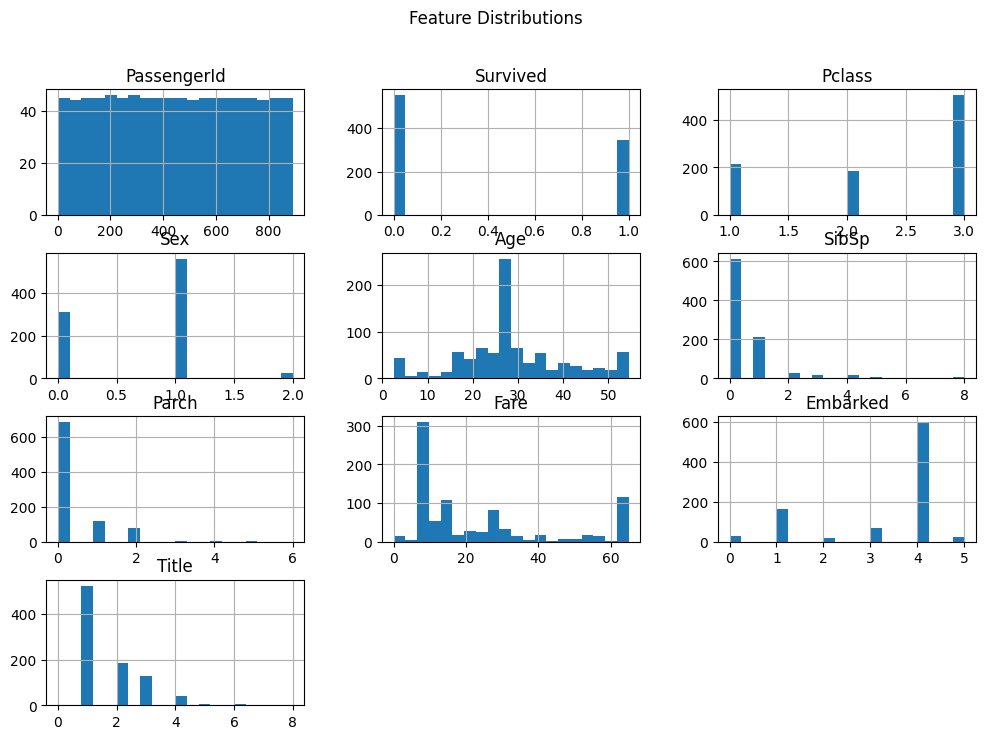

In [45]:
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

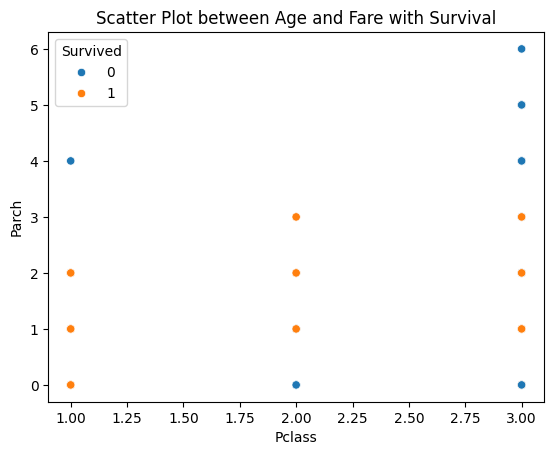

In [46]:
sns.scatterplot(x='Pclass', y='Parch', hue='Survived', data=df)
plt.title("Scatter Plot between Age and Fare with Survival")
plt.show()


In [47]:
print("Before Imputation:", df.isnull().sum())

Before Imputation: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          693
Embarked         0
Title            0
dtype: int64


In [17]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,909.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.252200,0.522552,0.380638,31.431149
std,257.212740,0.487387,12.889112,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,35.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:", df.shape)

After Removing Duplicates: (898, 13)


In [49]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [50]:
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,2.004454


In [20]:
df['Sex'] = df['Sex'].str.lower().replace({'femalee':'female','mal':'male','Male':'male','Female':'female'})
df['Embarked']=df['Embarked'].replace({'Southmpton':'S','Queenstown':'Q','Cherbourg':'C','cherbourg':'C'})
df['Embarked'] = df['Embarked'].str.lower()

In [22]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':8, 'Mlle':2, 'Countess':3, 'Mme':3, 'Don':1, 'Lady':3, 'Sir':1, 'Jonkheer':1, 'Capt':7}
df['Title'] = df['Title'].map(title_map).fillna(0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,s,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,c,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,s,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,s,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,s,1.0


In [26]:
df['Pclass'] = df['Pclass'].astype(str)              # ensure string type
df['Pclass'] = df['Pclass'].str.replace('st', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('nd', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('rd', '', regex=False)
df['Pclass'] = df['Pclass'].str.strip()              # remove any spaces
df['Pclass'] = df['Pclass'].astype(int)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

In [51]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
target = 'Survived'

# Impute missing 'Fare' values with the median before splitting
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

X = df[features]
y = df[target]

In [31]:
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (629, 7), Validation: (135, 7), Test: (135, 7)


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier


In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [58]:
y_pred_test = knn.predict(X_test)
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Test Set Evaluation:
Accuracy: 0.7481481481481481

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.69      0.64      0.67        53

    accuracy                           0.75       135
   macro avg       0.74      0.73      0.73       135
weighted avg       0.75      0.75      0.75       135



In [57]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_valid = knn.predict(X_valid)
print("Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("\nClassification Report:\n", classification_report(y_valid, y_pred_valid))

Validation Set Evaluation:
Accuracy: 0.6962962962962963

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78        80
           1       0.72      0.42      0.53        55

    accuracy                           0.70       135
   macro avg       0.70      0.65      0.65       135
weighted avg       0.70      0.70      0.68       135



In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (628, 7), Validation: (135, 7), Test: (135, 7)


In [53]:
print("Missing values in X_train after imputation and splitting:")
print(pd.DataFrame(X_train).isnull().sum())

print("\nMissing values in df after imputation:")
print(df.isnull().sum())

Missing values in X_train after imputation and splitting:
0    0
1    0
2    0
3    7
4    0
5    0
6    0
dtype: int64

Missing values in df after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          692
Embarked         0
Title            0
dtype: int64


In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

print("KNN Model Evaluation Metrics:")

KNN Model Evaluation Metrics:



Confusion Matrix:


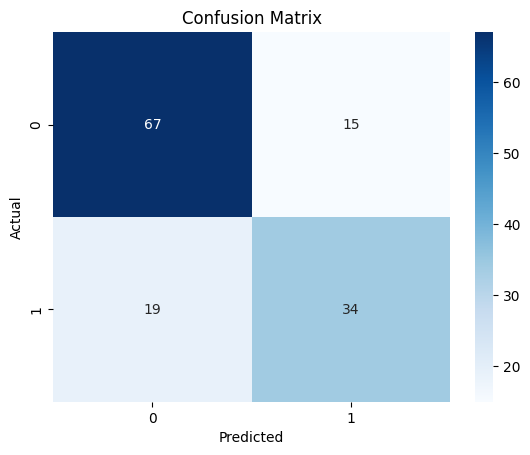

In [61]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.7481481481481481


In [63]:
prec = precision_score(y_test, y_pred)
print("Precision:",prec)


Precision: 0.6938775510204082


In [64]:
rec = recall_score(y_test, y_pred)
print("Recall (Sensitivity):",rec)

Recall (Sensitivity): 0.6415094339622641


In [65]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)

F1 Score: 0.6666666666666666


In [66]:
roc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:",roc)

ROC-AUC: 0.7292913023469858


In [67]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.69      0.64      0.67        53

    accuracy                           0.75       135
   macro avg       0.74      0.73      0.73       135
weighted avg       0.75      0.75      0.75       135



In [68]:
sample_passenger = pd.DataFrame(
    [[2, 0, 30, 20.5, 1, 0, 1]],
    columns=X.columns
)

sample_passenger_scaled = scaler.transform(sample_passenger)

predicted_survival = knn.predict(sample_passenger_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [69]:
print(f"Predicted Survival for unseen Passenger: {predicted_survival[0]} (0=Not Survived, 1=Survived)")

Predicted Survival for unseen Passenger: 1 (0=Not Survived, 1=Survived)


In [70]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [71]:
X_test_scaled = scaler.transform(X_test_df)

In [73]:
y_pred_test = knn.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[ 0 82]
 [ 0 53]]


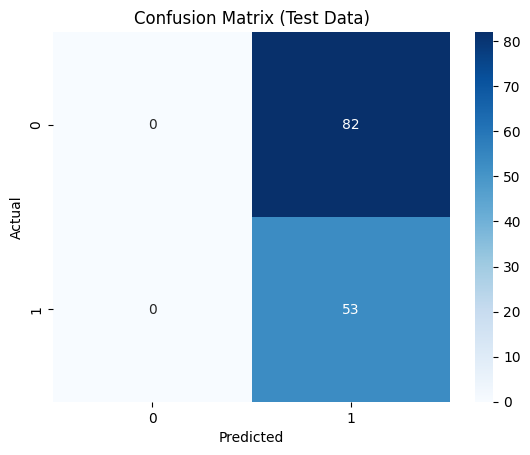

In [74]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [75]:
acc = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {acc:.3f}")

Test Accuracy: 0.393


In [76]:
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.39      1.00      0.56        53

    accuracy                           0.39       135
   macro avg       0.20      0.50      0.28       135
weighted avg       0.15      0.39      0.22       135



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
